In [1]:
import pandas as pd

In [2]:
# Cryptocurrency data
df = pd.read_csv('ETH_1h.csv')

In [3]:
df.head(10)

Date  Symbol    Open    High     Low   Close      Volume
0  2020-03-13 08-PM  ETHUSD  129.94  131.82  126.87  128.71  1940673.93
1  2020-03-13 07-PM  ETHUSD  119.51  132.02  117.10  129.94  7579741.09
2  2020-03-13 06-PM  ETHUSD  124.47  124.85  115.50  119.51  4898735.81
3  2020-03-13 05-PM  ETHUSD  124.08  127.42  121.63  124.47  2753450.92
4  2020-03-13 04-PM  ETHUSD  124.85  129.51  120.17  124.08  4461424.71
5  2020-03-13 03-PM  ETHUSD  128.39  128.90  116.06  124.85  7378976.00
6  2020-03-13 02-PM  ETHUSD  134.03  137.90  125.50  128.39  3733916.89
7  2020-03-13 01-PM  ETHUSD  131.35  140.95  128.99  134.03  9582732.93
8  2020-03-13 12-PM  ETHUSD  128.93  134.60  126.95  131.35  3906590.52
9  2020-03-13 11-AM  ETHUSD  132.60  133.17  126.01  128.93  3311080.29

In [4]:
df.shape

(23674, 7)

In [5]:
df.loc[0, 'Date']

'2020-03-13 08-PM'

In [6]:
# I cannot directly apply datetime methods to this value because it is a string. I first need to convert it to a 
# datetime object
type(df.loc[0, 'Date'])

str

In [7]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [8]:
# By default pandas will try its best to convert the values in the column to proper DateTime format.
# But if it can't convert the values, then it will throw an error saying unknown string format
# In such a case we will have to specify the format in which the values are present in the column so that pd.to_datetime()
# can convert it valid datetime format
df['Date'] = pd.to_datetime(df['Date'])

ParserError: Unknown string format: 2020-03-13 08-PM

In [9]:
# '2020-03-13 08-PM' -> %Y-%m-%d %I-%p
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [10]:
df.head(10)

Date  Symbol    Open    High     Low   Close      Volume
0 2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93
1 2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09
2 2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81
3 2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92
4 2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71
5 2020-03-13 15:00:00  ETHUSD  128.39  128.90  116.06  124.85  7378976.00
6 2020-03-13 14:00:00  ETHUSD  134.03  137.90  125.50  128.39  3733916.89
7 2020-03-13 13:00:00  ETHUSD  131.35  140.95  128.99  134.03  9582732.93
8 2020-03-13 12:00:00  ETHUSD  128.93  134.60  126.95  131.35  3906590.52
9 2020-03-13 11:00:00  ETHUSD  132.60  133.17  126.01  128.93  3311080.29

In [11]:
# Now if we check the type of the values in Date column
type(df.loc[0, 'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# Now we can apply datetime methods as well
df.loc[0, 'Date'].day_name()

'Friday'

In [13]:
# Now lets say we want to use the day_name method on the entire series
df['Date'].day_name()

AttributeError: 'Series' object has no attribute 'day_name'

In [14]:
# We get the above error because we cannot directly apply datetime methods to a series
# We first have to access the dt class and the apply the datetime methods
# This is similar to the str class. In order to apple the str methods like lower(), upper()
# We first have to access the str class and then apply the methods
# for example df['last'].str.lower() and no df['last'].lower()
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [15]:
# Create a new column for the DayName
df['DayName'] = df['Date'].dt.day_name()

In [16]:
df.head(50)

Date  Symbol    Open    High     Low   Close       Volume  \
0  2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71   1940673.93   
1  2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94   7579741.09   
2  2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51   4898735.81   
3  2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47   2753450.92   
4  2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08   4461424.71   
5  2020-03-13 15:00:00  ETHUSD  128.39  128.90  116.06  124.85   7378976.00   
6  2020-03-13 14:00:00  ETHUSD  134.03  137.90  125.50  128.39   3733916.89   
7  2020-03-13 13:00:00  ETHUSD  131.35  140.95  128.99  134.03   9582732.93   
8  2020-03-13 12:00:00  ETHUSD  128.93  134.60  126.95  131.35   3906590.52   
9  2020-03-13 11:00:00  ETHUSD  132.60  133.17  126.01  128.93   3311080.29   
10 2020-03-13 10:00:00  ETHUSD  133.80  134.99  128.90  132.60   3483436.48   
11 2020-03-13 09:00:00  ETHUSD  127.12  136.53  126.62  133.80   2767584.44   
12 2020-03-13 08:00:00  ETHUSD  127.57  133.10  121.94  127.12   6808571.23   
13 2020-03-13 07:00:00  ETHUSD  127.28  129.00  120.83  127.57   5255468.75   
14 2020-03-13 06:00:00  ETHUSD  116.87  127.93  114.45  127.28   5701691.64   
15 2020-03-13 05:00:00  ETHUSD  111.87  124.00  110.75  116.87   6507796.34   
16 2020-03-13 04:00:00  ETHUSD  130.91  130.91  106.43  111.87   7802511.68   
17 2020-03-13 03:00:00  ETHUSD  117.02  148.00  115.15  130.91  19431820.56   
18 2020-03-13 02:00:00  ETHUSD   98.88  127.74   90.00  117.02  18546413.74   
19 2020-03-13 01:00:00  ETHUSD  107.09  110.99   97.00   98.88   8079507.05   
20 2020-03-13 00:00:00  ETHUSD  110.30  117.50  102.92  107.09  10329663.69   
21 2020-03-12 23:00:00  ETHUSD  126.78  126.82  101.22  110.30  19338895.12   
22 2020-03-12 22:00:00  ETHUSD  130.30  134.25  124.83  126.78   8822759.15   
23 2020-03-12 21:00:00  ETHUSD  128.15  132.14  122.83  130.30   6500631.29   
24 2020-03-12 20:00:00  ETHUSD  138.00  138.96  124.04  128.15  19731142.71   
25 2020-03-12 19:00:00  ETHUSD  137.04  139.69  136.43  138.00   3815314.09   
26 2020-03-12 18:00:00  ETHUSD  141.80  143.00  136.52  137.04   2516644.89   
27 2020-03-12 17:00:00  ETHUSD  139.25  146.17  138.32  141.80   5055228.41   
28 2020-03-12 16:00:00  ETHUSD  141.24  142.49  134.53  139.25   4068304.19   
29 2020-03-12 15:00:00  ETHUSD  140.79  141.58  137.50  141.24   3419213.89   
30 2020-03-12 14:00:00  ETHUSD  135.39  144.00  131.00  140.79   8788199.04   
31 2020-03-12 13:00:00  ETHUSD  137.67  139.80  126.00  135.39   9683564.39   
32 2020-03-12 12:00:00  ETHUSD  136.83  144.63  135.00  137.67   9397363.08   
33 2020-03-12 11:00:00  ETHUSD  134.67  151.19  126.29  136.83  16556632.81   
34 2020-03-12 10:00:00  ETHUSD  167.50  168.30  126.28  134.67  17741252.81   
35 2020-03-12 09:00:00  ETHUSD  169.16  169.88  167.08  167.50   2524359.27   
36 2020-03-12 08:00:00  ETHUSD  171.38  172.07  166.24  169.16   4708832.94   
37 2020-03-12 07:00:00  ETHUSD  173.41  173.79  168.00  171.38   7019309.48   
38 2020-03-12 06:00:00  ETHUSD  181.43  181.53  171.14  173.41   8514139.23   
39 2020-03-12 05:00:00  ETHUSD  181.11  181.60  179.59  181.43   2282461.75   
40 2020-03-12 04:00:00  ETHUSD  182.55  182.57  177.16  181.11   4964683.12   
41 2020-03-12 03:00:00  ETHUSD  183.70  185.04  181.32  182.55   3095445.99   
42 2020-03-12 02:00:00  ETHUSD  184.43  187.30  182.00  183.70   4844506.45   
43 2020-03-12 01:00:00  ETHUSD  193.44  193.71  183.47  184.43   4970667.47   
44 2020-03-12 00:00:00  ETHUSD  194.61  195.64  192.02  193.44   1714112.98   
45 2020-03-11 23:00:00  ETHUSD  194.41  196.58  192.36  194.61   2605030.54   
46 2020-03-11 22:00:00  ETHUSD  189.38  195.14  188.36  194.41   3606516.34   
47 2020-03-11 21:00:00  ETHUSD  193.37  193.67  188.89  189.38   1788126.70   
48 2020-03-11 20:00:00  ETHUSD  190.09  193.37  189.34  193.37   3739916.02   
49 2020-03-11 19:00:00  ETHUSD  189.79  191.29  186.95  190.09   270

In [17]:
df.rename(columns={'DayName':'DayOfWeek'}, inplace=True)

In [18]:
df

Date  Symbol    Open    High     Low   Close      Volume  \
0     2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
1     2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2     2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
3     2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
4     2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                   ...     ...     ...     ...     ...     ...         ...   
23669 2017-07-01 15:00:00  ETHUSD  265.74  272.74  265.00  272.57  1500282.55   
23670 2017-07-01 14:00:00  ETHUSD  268.79  269.90  265.00  265.74  1702536.85   
23671 2017-07-01 13:00:00  ETHUSD  274.83  274.93  265.00  268.79  3010787.99   
23672 2017-07-01 12:00:00  ETHUSD  275.01  275.01  271.00  274.83   824362.87   
23673 2017-07-01 11:00:00  ETHUSD  279.98  279.99  272.10  275.01   679358.87   

      DayOfWeek  
0        Friday  
1        Friday  
2        Friday  
3        Friday  
4        Friday  
...         ...  
23669  Saturday  
23670  Saturday  
23671  Saturday  
23672  Saturday  
23673  Saturday  

[23674 rows x 8 columns]

In [19]:
# Earliest date in dataset
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [20]:
# Latest date in dataset
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [21]:
# We can also subtract dates to view to see the no. of days b/w them. i.e. TimeDelta
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [22]:
# Only data from year 2020
filt = (df['Date'] >= '2020')

In [23]:
df.loc[filt]

Date  Symbol    Open    High     Low   Close      Volume  \
0    2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
1    2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2    2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
3    2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
4    2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                  ...     ...     ...     ...     ...     ...         ...   
1744 2020-01-01 04:00:00  ETHUSD  129.57  130.00  129.50  129.56   702786.82   
1745 2020-01-01 03:00:00  ETHUSD  130.37  130.44  129.38  129.57   496704.23   
1746 2020-01-01 02:00:00  ETHUSD  130.14  130.50  129.91  130.37   396315.72   
1747 2020-01-01 01:00:00  ETHUSD  128.34  130.14  128.32  130.14   635419.40   
1748 2020-01-01 00:00:00  ETHUSD  128.54  128.54  128.12  128.34   245119.91   

      DayOfWeek  
0        Friday  
1        Friday  
2        Friday  
3        Friday  
4        Friday  
...         ...  
1744  Wednesday  
1745  Wednesday  
1746  Wednesday  
1747  Wednesday  
1748  Wednesday  

[1749 rows x 8 columns]

In [24]:
# Data from 2019 only
filt_2019 = (df['Date'] >= '2019') & (df['Date'] < '2020')

In [25]:
df.loc[filt_2019]

Date  Symbol    Open    High     Low   Close      Volume  \
1749  2019-12-31 23:00:00  ETHUSD  128.33  128.69  128.14  128.54   440678.91   
1750  2019-12-31 22:00:00  ETHUSD  128.38  128.69  127.95  128.33   554646.02   
1751  2019-12-31 21:00:00  ETHUSD  127.86  128.43  127.72  128.38   350155.69   
1752  2019-12-31 20:00:00  ETHUSD  127.84  128.34  127.71  127.86   428183.38   
1753  2019-12-31 19:00:00  ETHUSD  128.69  128.69  127.60  127.84  1169847.84   
...                   ...     ...     ...     ...     ...     ...         ...   
10504 2019-01-01 04:00:00  ETHUSD  130.75  133.96  130.74  131.96  2791135.37   
10505 2019-01-01 03:00:00  ETHUSD  130.06  130.79  130.06  130.75   503732.63   
10506 2019-01-01 02:00:00  ETHUSD  130.79  130.88  129.55  130.06   838183.43   
10507 2019-01-01 01:00:00  ETHUSD  131.62  131.62  130.77  130.79   434917.99   
10508 2019-01-01 00:00:00  ETHUSD  130.53  131.91  130.48  131.62  1067136.21   

      DayOfWeek  
1749    Tuesday  
1750    Tuesday  
1751    Tuesday  
1752    Tuesday  
1753    Tuesday  
...         ...  
10504   Tuesday  
10505   Tuesday  
10506   Tuesday  
10507   Tuesday  
10508   Tuesday  

[8760 rows x 8 columns]

In [26]:
# You can also pass more specific dates.
# But we will need to use pd.to_datetime() method to convert the str to datetime object
# 2019 Jan to 2019 March
filt_custom = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2019-03-01'))

In [27]:
df.loc[filt_custom]

Date  Symbol    Open    High     Low   Close      Volume  \
9093  2019-02-28 23:00:00  ETHUSD  134.68  135.53  134.40  134.48   350372.86   
9094  2019-02-28 22:00:00  ETHUSD  135.13  135.13  134.25  134.68   331870.37   
9095  2019-02-28 21:00:00  ETHUSD  134.99  135.37  134.86  135.13   330511.15   
9096  2019-02-28 20:00:00  ETHUSD  135.57  135.60  134.37  134.99  1023140.26   
9097  2019-02-28 19:00:00  ETHUSD  136.00  137.50  134.17  135.57  1208793.69   
...                   ...     ...     ...     ...     ...     ...         ...   
10504 2019-01-01 04:00:00  ETHUSD  130.75  133.96  130.74  131.96  2791135.37   
10505 2019-01-01 03:00:00  ETHUSD  130.06  130.79  130.06  130.75   503732.63   
10506 2019-01-01 02:00:00  ETHUSD  130.79  130.88  129.55  130.06   838183.43   
10507 2019-01-01 01:00:00  ETHUSD  131.62  131.62  130.77  130.79   434917.99   
10508 2019-01-01 00:00:00  ETHUSD  130.53  131.91  130.48  131.62  1067136.21   

      DayOfWeek  
9093   Thursday  
9094   Thursday  
9095   Thursday  
9096   Thursday  
9097   Thursday  
...         ...  
10504   Tuesday  
10505   Tuesday  
10506   Tuesday  
10507   Tuesday  
10508   Tuesday  

[1416 rows x 8 columns]

In [28]:
# One day 7 hours apart
df.loc[(df['Date'] >= pd.to_datetime('2019-01-01 01:00:00')) & (df['Date'] < pd.to_datetime('2019-01-01 08:00:00'))]

Date  Symbol    Open    High     Low   Close      Volume  \
10501 2019-01-01 07:00:00  ETHUSD  133.19  133.99  132.89  133.25   503423.08   
10502 2019-01-01 06:00:00  ETHUSD  132.48  133.30  132.48  133.19   436739.05   
10503 2019-01-01 05:00:00  ETHUSD  131.96  132.58  131.96  132.48   317851.90   
10504 2019-01-01 04:00:00  ETHUSD  130.75  133.96  130.74  131.96  2791135.37   
10505 2019-01-01 03:00:00  ETHUSD  130.06  130.79  130.06  130.75   503732.63   
10506 2019-01-01 02:00:00  ETHUSD  130.79  130.88  129.55  130.06   838183.43   
10507 2019-01-01 01:00:00  ETHUSD  131.62  131.62  130.77  130.79   434917.99   

      DayOfWeek  
10501   Tuesday  
10502   Tuesday  
10503   Tuesday  
10504   Tuesday  
10505   Tuesday  
10506   Tuesday  
10507   Tuesday

In [29]:
# Setting the 'Date' column as index.
# Now we can directly grab data for a year
df.set_index('Date', inplace=True)

In [30]:
df

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                     ...     ...     ...     ...     ...         ...   
2017-07-01 15:00:00  ETHUSD  265.74  272.74  265.00  272.57  1500282.55   
2017-07-01 14:00:00  ETHUSD  268.79  269.90  265.00  265.74  1702536.85   
2017-07-01 13:00:00  ETHUSD  274.83  274.93  265.00  268.79  3010787.99   
2017-07-01 12:00:00  ETHUSD  275.01  275.01  271.00  274.83   824362.87   
2017-07-01 11:00:00  ETHUSD  279.98  279.99  272.10  275.01   679358.87   

                    DayOfWeek  
Date                           
2020-03-13 20:00:00    Friday  
2020-03-13 19:00:00    Friday  
2020-03-13 18:00:00    Friday  
2020-03-13 17:00:00    Friday  
2020-03-13 16:00:00    Friday  
...                       ...  
2017-07-01 15:00:00  Saturday  
2017-07-01 14:00:00  Saturday  
2017-07-01 13:00:00  Saturday  
2017-07-01 12:00:00  Saturday  
2017-07-01 11:00:00  Saturday  

[23674 rows x 7 columns]

In [31]:
# Access data for 2018
df.loc['2018']
# We can also use df['2018']

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2018-12-31 23:00:00  ETHUSD  130.62  131.36  130.20  130.53   869026.39   
2018-12-31 22:00:00  ETHUSD  129.97  131.00  129.07  130.62  1972726.62   
2018-12-31 21:00:00  ETHUSD  130.90  130.90  129.47  129.97  1079617.65   
2018-12-31 20:00:00  ETHUSD  131.17  131.58  130.36  130.90  1775465.69   
2018-12-31 19:00:00  ETHUSD  134.83  134.90  128.50  131.17  3380282.07   
...                     ...     ...     ...     ...     ...         ...   
2018-01-01 04:00:00  ETHUSD  739.70  748.07  733.02  747.90  3180304.69   
2018-01-01 03:00:00  ETHUSD  730.01  739.70  728.66  739.70  3461348.11   
2018-01-01 02:00:00  ETHUSD  730.02  730.50  727.14  730.01  2950627.37   
2018-01-01 01:00:00  ETHUSD  734.59  735.10  730.01  730.02  1886624.01   
2018-01-01 00:00:00  ETHUSD  741.27  741.27  733.69  734.59  2697546.48   

                    DayOfWeek  
Date                           
2018-12-31 23:00:00    Monday  
2018-12-31 22:00:00    Monday  
2018-12-31 21:00:00    Monday  
2018-12-31 20:00:00    Monday  
2018-12-31 19:00:00    Monday  
...                       ...  
2018-01-01 04:00:00    Monday  
2018-01-01 03:00:00    Monday  
2018-01-01 02:00:00    Monday  
2018-01-01 01:00:00    Monday  
2018-01-01 00:00:00    Monday  

[8760 rows x 7 columns]

In [32]:
# We can also use slicing
df.loc['2017':'2018']

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2018-12-31 23:00:00  ETHUSD  130.62  131.36  130.20  130.53   869026.39   
2018-12-31 22:00:00  ETHUSD  129.97  131.00  129.07  130.62  1972726.62   
2018-12-31 21:00:00  ETHUSD  130.90  130.90  129.47  129.97  1079617.65   
2018-12-31 20:00:00  ETHUSD  131.17  131.58  130.36  130.90  1775465.69   
2018-12-31 19:00:00  ETHUSD  134.83  134.90  128.50  131.17  3380282.07   
...                     ...     ...     ...     ...     ...         ...   
2017-07-01 15:00:00  ETHUSD  265.74  272.74  265.00  272.57  1500282.55   
2017-07-01 14:00:00  ETHUSD  268.79  269.90  265.00  265.74  1702536.85   
2017-07-01 13:00:00  ETHUSD  274.83  274.93  265.00  268.79  3010787.99   
2017-07-01 12:00:00  ETHUSD  275.01  275.01  271.00  274.83   824362.87   
2017-07-01 11:00:00  ETHUSD  279.98  279.99  272.10  275.01   679358.87   

                    DayOfWeek  
Date                           
2018-12-31 23:00:00    Monday  
2018-12-31 22:00:00    Monday  
2018-12-31 21:00:00    Monday  
2018-12-31 20:00:00    Monday  
2018-12-31 19:00:00    Monday  
...                       ...  
2017-07-01 15:00:00  Saturday  
2017-07-01 14:00:00  Saturday  
2017-07-01 13:00:00  Saturday  
2017-07-01 12:00:00  Saturday  
2017-07-01 11:00:00  Saturday  

[13165 rows x 7 columns]

In [33]:
df.loc['2017-11':'2018-02']

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2018-02-28 23:00:00  ETHUSD  858.01  858.50  848.21  849.99  3984596.21   
2018-02-28 22:00:00  ETHUSD  867.64  867.64  858.00  858.01  2331400.93   
2018-02-28 21:00:00  ETHUSD  869.62  873.00  866.05  867.64  1598750.30   
2018-02-28 20:00:00  ETHUSD  867.68  872.90  867.61  869.62  2967534.77   
2018-02-28 19:00:00  ETHUSD  865.86  867.90  865.30  867.68   950462.68   
...                     ...     ...     ...     ...     ...         ...   
2017-11-01 04:00:00  ETHUSD  303.62  304.47  303.53  303.64   501653.76   
2017-11-01 03:00:00  ETHUSD  304.78  304.79  303.39  303.62   389271.54   
2017-11-01 02:00:00  ETHUSD  303.36  305.00  303.30  304.78   304092.14   
2017-11-01 01:00:00  ETHUSD  302.94  303.94  302.72  303.36   444362.32   
2017-11-01 00:00:00  ETHUSD  303.50  303.51  302.12  302.94   637740.55   

                     DayOfWeek  
Date                            
2018-02-28 23:00:00  Wednesday  
2018-02-28 22:00:00  Wednesday  
2018-02-28 21:00:00  Wednesday  
2018-02-28 20:00:00  Wednesday  
2018-02-28 19:00:00  Wednesday  
...                        ...  
2017-11-01 04:00:00  Wednesday  
2017-11-01 03:00:00  Wednesday  
2017-11-01 02:00:00  Wednesday  
2017-11-01 01:00:00  Wednesday  
2017-11-01 00:00:00  Wednesday  

[2880 rows x 7 columns]

In [34]:
df.sort_values(by=['High'], ascending=False).head(50)

Symbol     Open     High      Low    Close       Volume  \
Date                                                                           
2018-01-13 21:00:00  ETHUSD  1418.61  1419.96  1360.99  1395.00  11452917.63   
2018-01-13 18:00:00  ETHUSD  1388.99  1418.96  1388.99  1410.00  27959588.92   
2018-01-13 20:00:00  ETHUSD  1382.56  1418.80  1382.50  1418.61  15617541.24   
2018-01-13 19:00:00  ETHUSD  1410.00  1418.33  1365.88  1382.56  23061241.98   
2018-01-13 22:00:00  ETHUSD  1395.00  1404.00  1383.63  1392.24   9849624.19   
2018-01-13 23:00:00  ETHUSD  1392.24  1393.12  1364.00  1386.02  13550709.64   
2018-01-13 17:00:00  ETHUSD  1365.01  1393.00  1365.00  1388.99  19922526.55   
2018-01-14 01:00:00  ETHUSD  1356.00  1389.11  1350.11  1383.51   9947055.75   
2018-01-10 04:00:00  ETHUSD  1342.19  1386.99  1311.50  1382.94  46946765.95   
2018-01-14 00:00:00  ETHUSD  1386.02  1386.02  1348.95  1356.00  10745908.38   
2018-01-14 03:00:00  ETHUSD  1376.01  1385.75  1370.95  1383.44   4304573.35   
2018-01-14 02:00:00  ETHUSD  1383.51  1385.00  1355.00  1376.01   7587752.16   
2018-01-14 04:00:00  ETHUSD  1383.44  1383.44  1323.50  1345.90  11369006.62   
2018-01-10 05:00:00  ETHUSD  1382.94  1383.00  1335.00  1356.69  27880234.66   
2018-01-15 00:00:00  ETHUSD  1365.46  1380.97  1353.86  1379.90   9719853.71   
2018-01-15 01:00:00  ETHUSD  1379.90  1379.91  1338.14  1338.15  12685661.16   
2018-01-10 06:00:00  ETHUSD  1356.69  1378.80  1321.01  1361.00  17538392.35   
2018-01-14 23:00:00  ETHUSD  1346.86  1370.00  1346.86  1365.46  12461547.29   
2018-01-13 16:00:00  ETHUSD  1353.99  1368.98  1351.31  1365.01   8491755.27   
2018-01-10 07:00:00  ETHUSD  1361.00  1367.05  1316.83  1321.49  15386497.61   
2018-01-14 06:00:00  ETHUSD  1340.00  1366.97  1338.98  1354.32   6096893.58   
2018-01-10 12:00:00  ETHUSD  1349.00  1361.98  1323.00  1323.00  10262427.14   
2018-01-14 08:00:00  ETHUSD  1342.24  1360.00  1339.03  1351.20   2685695.11   
2018-01-13 14:00:00  ETHUSD  1349.99  1359.98  1335.88  1349.00   9625325.76   
2018-01-10 13:00:00  ETHUSD  1323.00  1358.00  1323.00  1333.01  13656940.53   
2018-01-14 05:00:00  ETHUSD  1345.90  1357.47  1322.00  1340.00  11408732.79   
2018-01-14 07:00:00  ETHUSD  1354.32  1356.33  1336.72  1342.24   3289237.39   
2018-01-10 11:00:00  ETHUSD  1289.30  1355.01  1275.31  1349.00   9872711.00   
2018-01-13 15:00:00  ETHUSD  1349.00  1354.99  1337.00  1353.99   6927786.40   
2018-01-14 09:00:00  ETHUSD  1351.20  1351.21  1328.07  1337.84   4404769.76   
2018-01-14 10:00:00  ETHUSD  1337.84  1350.46  1330.00  1341.31   2346217.55   
2018-01-13 13:00:00  ETHUSD  1349.01  1350.00  1345.72  1349.99   7210248.52   
2018-01-14 22:00:00  ETHUSD  1326.79  1350.00  1323.50  1346.86   6258181.29   
2018-01-10 15:00:00  ETHUSD  1322.82  1349.99  1320.00  1340.81  18642924.36   
2018-01-13 12:00:00  ETHUSD  1334.66  1349.01  1334.62  1349.01   5516221.90   
2018-01-14 13:00:00  ETHUSD  1295.03  1346.97  1294.25  1343.11   8007858.78   
2018-01-14 11:00:00  ETHUSD  1341.31  1346.48  1322.01  1331.87   3550754.85   
2018-01-10 14:00:00  ETHUSD  1333.01  1345.94  1286.00  1322.82  18726233.02   
2018-01-15 06:00:00  ETHUSD  1335.06  1345.90  1335.00  1339.46   3120113.22   
2018-01-10 16:00:00  ETHUSD  1340.81  1345.00  1295.15  1317.98  17337203.44   
2018-01-10 03:00:00  ETHUSD  1295.70  1343.91  1295.70  1342.19  39576443.74   
2018-01-14 14:00:00  ETHUSD  1343.11  1343.12  1315.00  1317.94   5439257.46   
2018-01-15 03:00:00  ETHUSD  1337.51  1341.42  1318.00  1328.89   5859254.76   
2018-01-15 02:00:00  ETHUSD  1338.15  1341.00  1314.00  1337.51  13915149.58   
2018-01-15 07:00:00  ETHUSD  1339.46  1340.00  1326.20  1326.20   2865114.24   
2018-01-10 17:00:00  ETHUSD  1317.98  1338.90  1291.50  1326.22  13321698.06   
2018-01-15 05:00:00  ETHUSD  1326.99  1338.85  1320.29  1335.06   4304016.93   
2018-01-14 19:00:00  ETHUSD  1332.78  1337.45  1313.03  1318.99   6473629.51   
2018-01-11 00:00:00  

In [35]:
df.loc['2020-01':'2020-02', 'Close']

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1440, dtype: float64

In [36]:
# Mean average closing price for above data range
df.loc['2020-01':'2020-02', 'Close'].mean()

195.16559027777814

In [37]:
# High column for the day 2018-01-13
df.loc['2018-01-13', 'High']

Date
2018-01-13 23:00:00    1393.12
2018-01-13 22:00:00    1404.00
2018-01-13 21:00:00    1419.96
2018-01-13 20:00:00    1418.80
2018-01-13 19:00:00    1418.33
2018-01-13 18:00:00    1418.96
2018-01-13 17:00:00    1393.00
2018-01-13 16:00:00    1368.98
2018-01-13 15:00:00    1354.99
2018-01-13 14:00:00    1359.98
2018-01-13 13:00:00    1350.00
2018-01-13 12:00:00    1349.01
2018-01-13 11:00:00    1335.00
2018-01-13 10:00:00    1332.99
2018-01-13 09:00:00    1330.44
2018-01-13 08:00:00    1335.00
2018-01-13 07:00:00    1335.00
2018-01-13 06:00:00    1316.88
2018-01-13 05:00:00    1319.99
2018-01-13 04:00:00    1292.68
2018-01-13 03:00:00    1294.87
2018-01-13 02:00:00    1294.05
2018-01-13 01:00:00    1288.13
2018-01-13 00:00:00    1279.72
Name: High, dtype: float64

In [38]:
# Highest high value for the day 2018-01-13
df.loc['2018-01-13', 'High'].max()


1419.96

In [39]:
# Lowest high value for the day 2018-01-13
df.loc['2018-01-13', 'High'].min()

1279.72

In [40]:
# Resampling the high values based on the day and not hourly basis.
df['High'].resample('D')

In [41]:
# Now lets check the max high value for each day
max_day_high = df['High'].resample('D').max()
max_day_high

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [42]:
max_day_high.loc['2018-01-13']
# We can also use day_high['2018-01-13']

1419.96

In [43]:
# lets check minimum high value for each day
min_day_high = df['High'].resample('D').min() 
min_day_high

Date
2017-07-01    260.56
2017-07-02    257.92
2017-07-03    276.23
2017-07-04    270.23
2017-07-05    257.63
               ...  
2020-03-09    195.63
2020-03-10    199.37
2020-03-11    190.41
2020-03-12    126.82
2020-03-13    110.99
Freq: D, Name: High, Length: 987, dtype: float64

In [44]:
min_day_high.loc['2018-01-13']

1279.72

In [45]:
%matplotlib inline

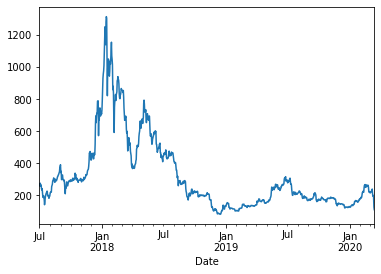

In [46]:
min_day_high.plot()

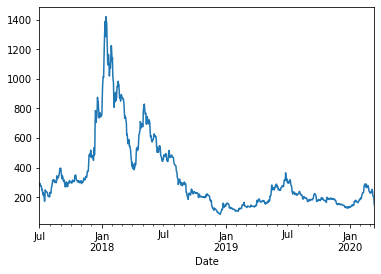

In [47]:
max_day_high.plot()

In [48]:
df

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                     ...     ...     ...     ...     ...         ...   
2017-07-01 15:00:00  ETHUSD  265.74  272.74  265.00  272.57  1500282.55   
2017-07-01 14:00:00  ETHUSD  268.79  269.90  265.00  265.74  1702536.85   
2017-07-01 13:00:00  ETHUSD  274.83  274.93  265.00  268.79  3010787.99   
2017-07-01 12:00:00  ETHUSD  275.01  275.01  271.00  274.83   824362.87   
2017-07-01 11:00:00  ETHUSD  279.98  279.99  272.10  275.01   679358.87   

                    DayOfWeek  
Date                           
2020-03-13 20:00:00    Friday  
2020-03-13 19:00:00    Friday  
2020-03-13 18:00:00    Friday  
2020-03-13 17:00:00    Friday  
2020-03-13 16:00:00    Friday  
...                       ...  
2017-07-01 15:00:00  Saturday  
2017-07-01 14:00:00  Saturday  
2017-07-01 13:00:00  Saturday  
2017-07-01 12:00:00  Saturday  
2017-07-01 11:00:00  Saturday  

[23674 rows x 7 columns]

In [50]:
# I am going to resample the data on a weeky basis.
# But in order to view the results we will have to apply aggregrate functions after resampling
# Why do we need to apply aggregrate funtions after resampling the data?
''' Ans: Initially when the data was sampled on a hourly basis, we had 1 value for each hour. So for a week we would 
have 24*7 values. Now when we are resampling it on a weeky basis, we will have only one value for an entire week.
So we basically need to aggregrate the 24*7 values into one single value in a meaningful way.
''' 
# 'High' -> 'max'
# 'Low' -> 'min'
# 'Close' -> 'mean'
# 'Volume' -> 'sum'


' Ans: Initially when the data was sampled on a hourly basis, we had 1 value for each hour. So for a week we would \nhave 24*7 values. Now when we are resampling it on a weeky basis, we will have only one value for an entire week.\nSo we basically need to aggregrate the 24*7 values into one single value in a meaningful way.\n'

In [54]:
resampled_df = df.resample('W').agg({'High':'max', 'Low':'min', 'Close':'mean', 'Volume':'sum'})
resampled_df

High     Low       Close        Volume
Date                                                
2017-07-02  293.73  253.23  268.202162  8.084631e+07
2017-07-09  285.00  231.25  261.062083  2.246746e+08
2017-07-16  240.33  130.26  195.698393  5.017750e+08
2017-07-23  249.40  153.25  212.783750  7.221637e+08
2017-07-30  229.99  178.03  203.309524  2.657305e+08
...            ...     ...         ...           ...
2020-02-16  290.00  216.31  255.198452  3.912867e+08
2020-02-23  287.13  242.36  265.321905  3.067838e+08
2020-03-01  278.13  209.26  236.373988  3.693920e+08
2020-03-08  253.01  196.00  229.817619  2.736569e+08
2020-03-15  208.65   90.00  176.332821  4.983998e+08

[142 rows x 4 columns]

In [56]:
resampled_df.head(50)


High     Low        Close        Volume
Date                                                  
2017-07-02   293.73  253.23   268.202162  8.084631e+07
2017-07-09   285.00  231.25   261.062083  2.246746e+08
2017-07-16   240.33  130.26   195.698393  5.017750e+08
2017-07-23   249.40  153.25   212.783750  7.221637e+08
2017-07-30   229.99  178.03   203.309524  2.657305e+08
2017-08-06   273.00  190.78   225.313274  3.358722e+08
2017-08-13   319.70  257.10   294.084167  4.574880e+08
2017-08-20   309.41  267.00   295.947560  2.432700e+08
2017-08-27   348.20  292.00   324.307679  3.095004e+08
2017-09-03   396.88  333.00   368.751012  4.165082e+08
2017-09-10   353.15  285.00   317.557083  4.785989e+08
2017-09-17   316.19  202.25   268.933988  5.312297e+08
2017-09-24   303.50  252.55   280.685952  2.929341e+08
2017-10-01   312.75  278.00   296.645595  1.792560e+08
2017-10-08   314.62  286.69   299.774464  1.196480e+08
2017-10-15   349.00  285.88   315.960417  2.674987e+08
2017-10-22   350.00  287.40   310.205655  2.253753e+08
2017-10-29   311.70  275.46   297.132321  1.595105e+08
2017-11-05   309.94  278.88   299.016131  1.891872e+08
2017-11-12   329.47  287.00   306.247262  3.329797e+08
2017-11-19   374.70  306.50   332.218393  3.233335e+08
2017-11-26   488.00  350.50   408.478036  6.196233e+08
2017-12-03   518.13  401.50   462.579583  7.678713e+08
2017-12-10   535.10  415.01   457.751548  8.949999e+08
2017-12-17   784.77  445.75   650.875476  1.726848e+09
2017-12-24   875.00  460.00   753.327143  1.692304e+09
2017-12-31   771.00  676.03   730.924762  6.306343e+08
2018-01-07  1118.30  727.14   924.839702  1.402718e+09
2018-01-14  1419.96  951.00  1253.946786  2.234835e+09
2018-01-21  1380.97  757.00  1095.067202  2.360772e+09
2018-01-28  1224.00  905.00  1046.498571  1.169780e+09
2018-02-04  1221.74  726.43  1026.990536  1.726831e+09
2018-02-11   908.76  555.56   795.191131  1.654398e+09
2018-02-18   982.99  810.99   905.759048  6.334218e+08
2018-02-25   958.00  786.40   868.955298  5.112276e+08
2018-03-04   894.00  835.00   863.254048  2.938868e+08
2018-03-11   866.00  641.60   760.532738  4.579661e+08
2018-03-18   739.00  450.00   624.001964  5.836886e+08
2018-03-25   589.75  507.84   540.010952  3.900980e+08
2018-04-01   525.00  360.00   427.340179  5.019800e+08
2018-04-08   421.59  363.33   386.616071  2.553599e+08
2018-04-15   534.57  388.00   457.498333  4.284396e+08
2018-04-22   643.47  498.29   555.477857  4.531572e+08
2018-04-29   711.00  578.75   660.437143  6.608632e+08
2018-05-06   828.97  627.20   732.026071  6.232998e+08
2018-05-13   789.98  638.88   721.294286  6.263108e+08
2018-05-20   745.00  656.50   702.438393  4.103036e+08
2018-05-27   717.00  545.36   620.512976  4.051227e+08
2018-06-03   627.83  507.00   569.566607  3.531800e+08
2018-06-10   626.55  505.00   594.825060  2.771851e+08

In [57]:
resampled_df.loc['2018-01-14']

High      1.419960e+03
Low       9.510000e+02
Close     1.253947e+03
Volume    2.234835e+09
Name: 2018-01-14 00:00:00, dtype: float64

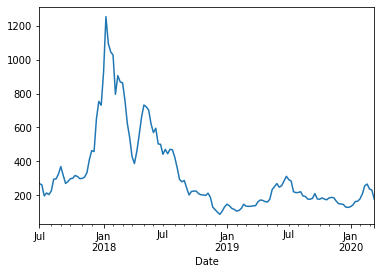

In [59]:
resampled_df['Close'].plot()

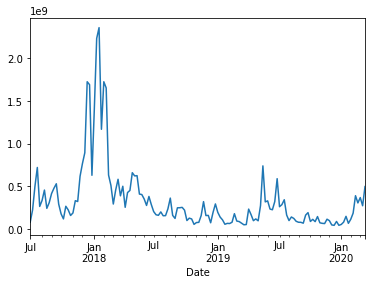

In [60]:
resampled_df['Volume'].plot()

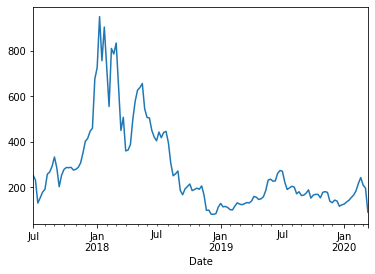

In [62]:
resampled_df['Low'].plot()

In [63]:
resampled_df

High     Low       Close        Volume
Date                                                
2017-07-02  293.73  253.23  268.202162  8.084631e+07
2017-07-09  285.00  231.25  261.062083  2.246746e+08
2017-07-16  240.33  130.26  195.698393  5.017750e+08
2017-07-23  249.40  153.25  212.783750  7.221637e+08
2017-07-30  229.99  178.03  203.309524  2.657305e+08
...            ...     ...         ...           ...
2020-02-16  290.00  216.31  255.198452  3.912867e+08
2020-02-23  287.13  242.36  265.321905  3.067838e+08
2020-03-01  278.13  209.26  236.373988  3.693920e+08
2020-03-08  253.01  196.00  229.817619  2.736569e+08
2020-03-15  208.65   90.00  176.332821  4.983998e+08

[142 rows x 4 columns]